<a href="https://colab.research.google.com/github/KornkanChangsila/DataCamp/blob/master/Project%3A%20Planning%20Public%20Policy%20in%20Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducion
โปรเจคนี้อยู่ในแพลตฟอร์มออนไลน์ชื่อว่า datacamp โดยจะมีแนะนำว่าแต่ละขั้นตอนเราต้องทำอะไร ซึ่งสิ่งที่เราต้องทำก็คือการเขียนโค้ดให้ได้คำตอบในแต่ละ task ที่วางไว้โดยใช้ R Programming โดยโปรเจคนี้เกี่ยวข้องกับการจัดสรรทรัพยากรสาธารณะในการวางแผนการศึกษา ด้วยการวิเคราะห์ตัวแปรทางเศรษฐกิจและสังคมต่างๆของประเทศอาร์เจนตินา

สิ่งที่ datacamp แนะนำว่าต้องมีก่อนทำโปรเจคนี้คือพื้นฐาน dplyr, ggplot2, PCA, K-means Clustering
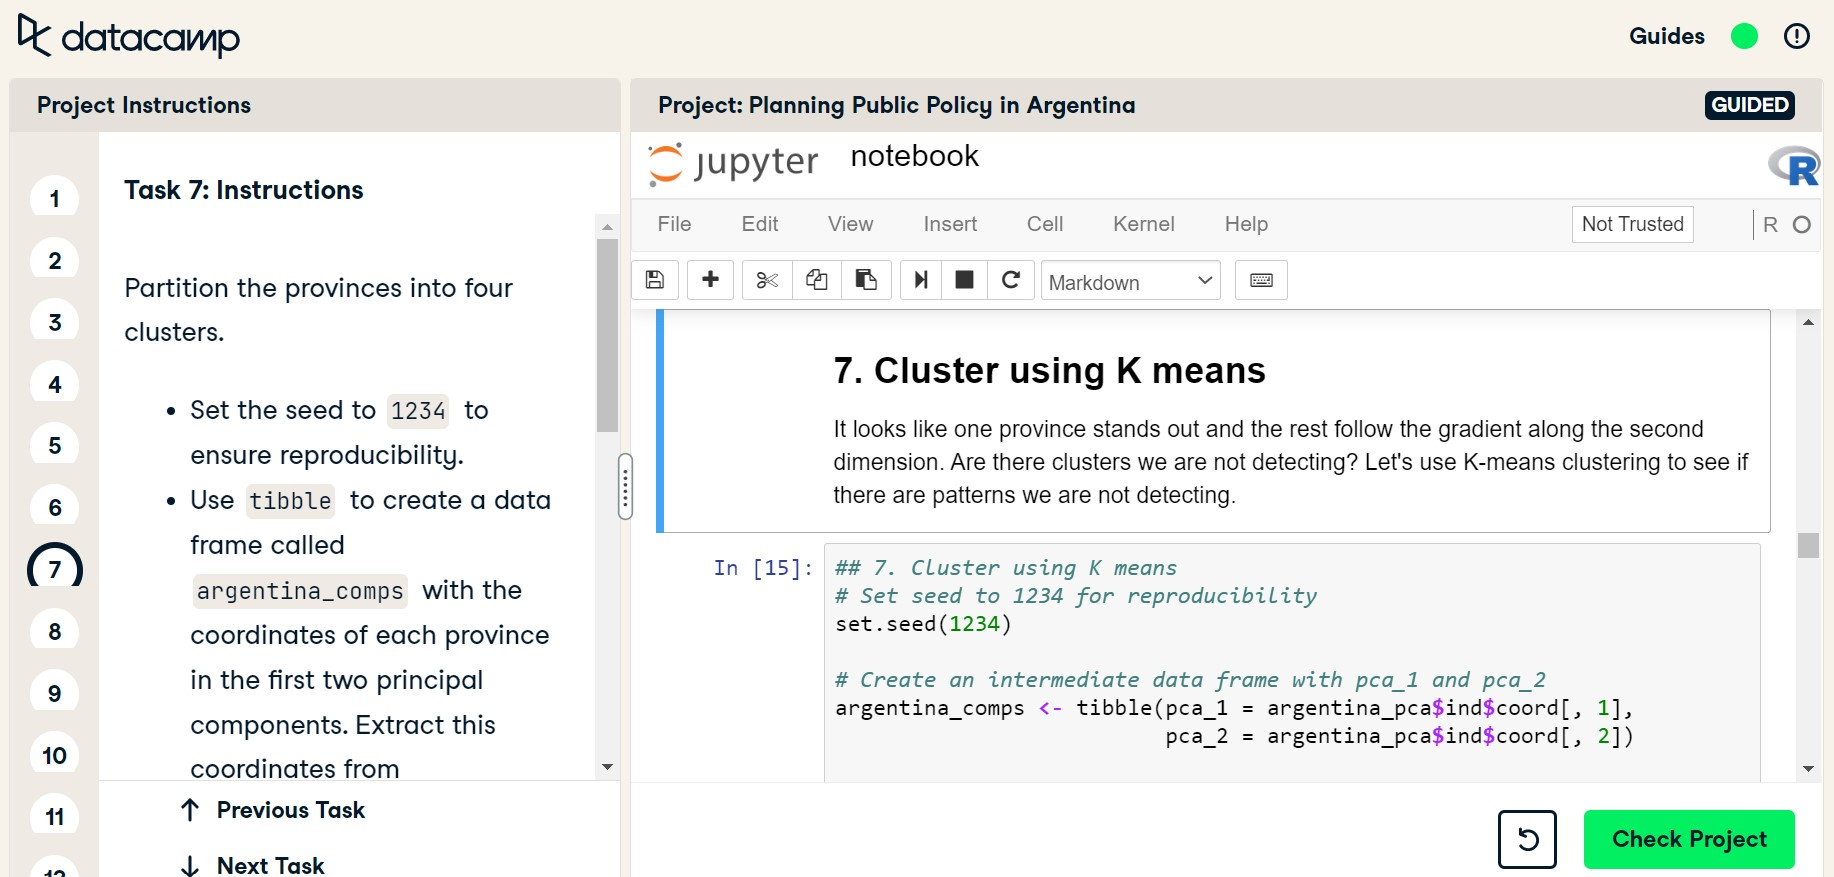

## 1. Provinces of Argentina
อาร์เจนตินาเป็นประเทศที่มีเศรษฐกิจใหญ่ที่สุดและมีพื้นที่ใหญ่เป็นอันดับ 2 ในทวีปอเมริกาใต้ เราจะวิเคราะห์ข้อมูลทางเศรษฐกิจและสังคมที่รวบรวมจากแต่ละจังหวัด 10 ตัวแปร โดยใช้ Principle Component Analysis (PCA) เพื่อลดความซ้ำซ้อนของข้อมูล จากนั้นใช้ K-Means Clustering เพื่อแบ่งแต่ละจังหวัดให้เป็นกลุ่มที่มีการพัฒนาใกล้เคียงกัน ผลลัพธ์นี้จะเป็นประโยชน์ในการจัดสรรทรัพยากรเพื่อใช้พัฒนาจังหวัดต่างๆ

In [ ]:
# install.packages(c('tidyverse', 'FactoMineR', 'factoextra', 'ggrepel'))

## 1. Provinces of Argentina
# Load the tidyverse
library(tidyverse)

# Read in the dataset
argentina <- read_csv('datasets/argentina.csv')

# Inspect the first rows of the dataset
nrow(argentina)
head(argentina)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  province = col_character(),
  gdp = col_double(),
  illiteracy = col_double(),
  poverty = col_double(),
  deficient_infra = col_double(),
  school_dropout = col_double(),
  no_healthcare = col_double(),
  birth_mortal = col_double(),
  pop = col_double(),
  movie_theatres_per_cap = col_double(),
  doctors_per_cap = col_double()
)


[1] 22

province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Buenos Aires,292689868,1.38324,8.167798,5.511856,0.7661682,48.7947,4.4,15625084,6.015968e-06,0.004835622
Catamarca,6150949,2.34414,9.234095,10.464484,0.9519631,45.0456,1.5,367828,5.437324e-06,0.004502104
C<U+00F3>rdoba,69363739,2.71414,5.382380,10.436086,1.0350558,45.7640,4.8,3308876,1.118204e-05,0.010175359
Corrientes,7968013,5.60242,12.747191,17.438858,3.8642652,62.1103,5.9,992595,4.029841e-06,0.004495288
Chaco,9832643,7.51758,15.862619,31.479527,2.5774621,65.5104,7.5,1055259,2.842904e-06,0.003604802
Chubut,17747854,1.54806,8.051752,8.044618,0.5863094,39.5473,3.0,509108,1.571376e-05,0.004498063


## 2. Most populous, richest provinces
โดยอาร์เจนติน่ามีประชากรถึง 60% อาศัยอยู่ในภูมิภาค Pumpa ซึ่งเป็นแค่ 20% ของพื้นที่ทั้งหมด เราจะลองมาสำรวจข้อมูลโดยหาจังหวัดที่รวยที่สุดโดยอิงจาก GDP Per Capita และหาจังหวัดที่มีประชากรมากกว่า 1 ล้านคน

In [ ]:
## 2. Most populous, richest provinces
# Add gdp_per_capita column to argentina
argentina <- argentina %>%
  mutate(gdp_per_cap = gdp/pop)

# Find the four richest provinces
rich_provinces <- argentina %>%
  select(province, gdp_per_cap) %>%
  arrange(desc(gdp_per_cap)) %>%
  head(4)

rich_provinces

# Find the provinces with populations over 1 million
bigger_pops <- argentina %>%
  select(province, pop) %>%
  filter(pop > 1000000) %>%
  arrange(desc(pop))

bigger_pops

province,gdp_per_cap
<chr>,<dbl>
Santa Cruz,42.57398
Neuqu<U+00E9>n,40.93143
Chubut,34.86069
San Luis,27.25093


province,pop
<chr>,<dbl>
Buenos Aires,15625084
C<U+00F3>rdoba,3308876
Santa Fe,3194537
Mendoza,1738929
Tucum<U+00E1>n,1448188
Entre R<U+00ED>os,1235994
Salta,1214441
Misiones,1101593
Chaco,1055259


## 3. A matrix for PCA
Principle Component Analysis (PCA) เป็นเทคนิคของ Unsupervised Learning ซึ่งเป็นการหาความสัมพันธ์ของข้อมูลภายในตัวแปรและให้ความสำคัญกับข้อมูลที่มีความสัมพันธ์มากกว่าก่อน เพื่อลดจำนวนตัวแปร สามารถนำไปใช้ต่อได้ง่ายและมีประสิทธิภาพมากขึ้น
ซึ่ง PCA เหมาะอย่างยิ่งสำหรับข้อมูลชุดนี้ เนื่องจากมีคอลัมน์ตัวเลขหลายคอลัมน์และมีความสัมพันธ์กันสูง

In [ ]:
## 3. A matrix for PCA
# Select numeric columns and cast to matrix
argentina_matrix <- argentina %>%
  select_if(is.numeric) %>%
  as.matrix()

# Print the first lines of the result
argentina_matrix %>%
  head()

# Reducing dimensions
library(FactoMineR)
argentina_pca <- PCA(argentina_matrix, scale.unit = TRUE)

gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,gdp_per_cap
292689868,1.38324,8.167798,5.511856,0.7661682,48.7947,4.4,15625084,6.015968e-06,0.004835622,18.732051
6150949,2.34414,9.234095,10.464484,0.9519631,45.0456,1.5,367828,5.437324e-06,0.004502104,16.722352
69363739,2.71414,5.382380,10.436086,1.0350558,45.7640,4.8,3308876,1.118204e-05,0.010175359,20.962931
7968013,5.60242,12.747191,17.438858,3.8642652,62.1103,5.9,992595,4.029841e-06,0.004495288,8.027456
9832643,7.51758,15.862619,31.479527,2.5774621,65.5104,7.5,1055259,2.842904e-06,0.003604802,9.317753
17747854,1.54806,8.051752,8.044618,0.5863094,39.5473,3.0,509108,1.571376e-05,0.004498063,34.860686


## 4. PCA: Variables & Components
เราจะสร้าง Variable Correlation Plot เพื่อแสดงความสัมพันธ์ทั้งหมดของตัวแปรด้วยตัวประกอบหลักจาก PCA สองตัวแรก 

โดยวิธีการอ่านกราฟ
*   ตัวแปรที่มีความสัมพันธ์กันในทางบวกจะมีเวกเตอร์ชี้ไปทางเดียวกัน 
*   ตัวแปรที่มีความสัมพันธ์กันในทางลบเวกเตอร์จะชี้ในทางตรงกันข้าม
* ถ้าตัวแปรที่่เวกเตอร์ตั้งฉากกันแสดงว่าไม่มีความสัมพันธ์กัน





In [ ]:
## 4. PCA: Variables & Components
# Load factoextra
library(factoextra)

# Set the size of plots in this notebook
options(repr.plot.width = 7, repr.plot.height = 5)

# Plot the original variables and the first 2 components and print the plot object.
pca_var_plot <- fviz_pca_var(argentina_pca)

# Sum the variance preserved by the first two components. Print the result.
variance_first_two_pca <- argentina_pca$eig[1, 2] + argentina_pca$eig[2, 2]
variance_first_two_pca

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


[1] 63.54897

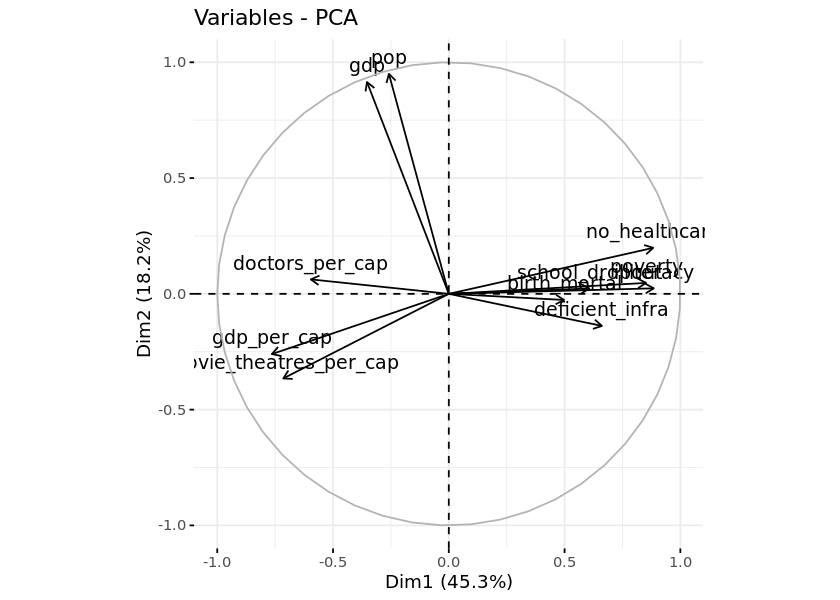

## 5. Plotting the components
จาก PCA นั้นข้อมูล 2 ตัวแรกเป็น 63% ของความแปรปรวน ข้อมูลส่วนใหญ่ของเราจึงสรุปไว้ใน 2 องค์ประกอบนี้ และจาก Variable Correlation Plot
*   ประชากรกับ GDP และ จำนวนโรงหนังต่อหัวกับ GDP ต่อหัวนั้นมีความสัมพันธ์กันอย่างมาก
*   การไม่รู้หนังสือ ความยากจน ไม่ได้รับการดูแลสุขภาพ การออกโรงเรียนกลางคัน การขาดแคลนโครงสร้างพื้นฐาน มีความสัมพันธ์กัน

แต่ความสัมพันธ์เหล่านี้เชื่อมโยงกับจังหวัดอย่างไร?



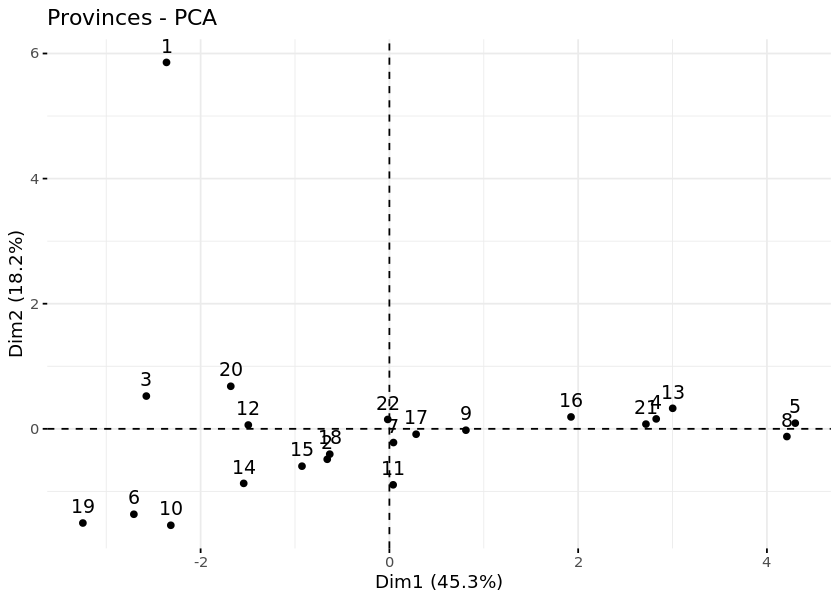

In [ ]:
## 5. Plotting the components
# Visualize Dim2 vs. Dim1
fviz_pca_ind(argentina_pca,
             title = "Provinces - PCA")

## 6. Cluster using K means
จากกราฟมีจังหวัดที่ 1 ที่โดดเด่นออกมาส่วนที่เหลือเกาะกลุ่มกัน เราจะใช้ K-mean เพื่อดูว่ามีกลุ่มไหนอีกบ้างในข้อมูลที่เกาะกลุ่มกันอยู่



In [ ]:
## 6. Cluster using K means
# Set seed to 1234 for reproducibility
set.seed(1234)

# Create an intermediate data frame with pca_1 and pca_2
argentina_comps <- tibble(pca_1 = argentina_pca$ind$coord[, 1],
                          pca_2 = argentina_pca$ind$coord[, 2])

# Cluster the observations using the first 2 components and print its contents
argentina_km <- kmeans(argentina_comps,
                       centers = 4,
                       nstart = 20,
                       iter.max = 50)
argentina_km

K-means clustering with 4 clusters of sizes 1, 7, 6, 8

Cluster means:
       pca_1      pca_2
1 -2.3614699  5.8572297
2 -2.2235295 -0.5740342
3  3.1637648  0.1200775
4 -0.1320515 -0.3199319

Clustering vector:
 [1] 1 4 2 3 3 2 4 3 4 2 4 2 3 2 4 3 4 4 2 2 3 4

Within cluster sum of squares by cluster:
[1] 0.000000 8.403846 4.375350 3.109136
 (between_SS / total_SS =  89.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

## 7. Components with colors
ตอนนี้เรามีกลุ่มสำหรับแต่ละจังหวัดแล้ว เราจะมีสร้างกราฟโดยแบ่งสีตามกลุ่ม

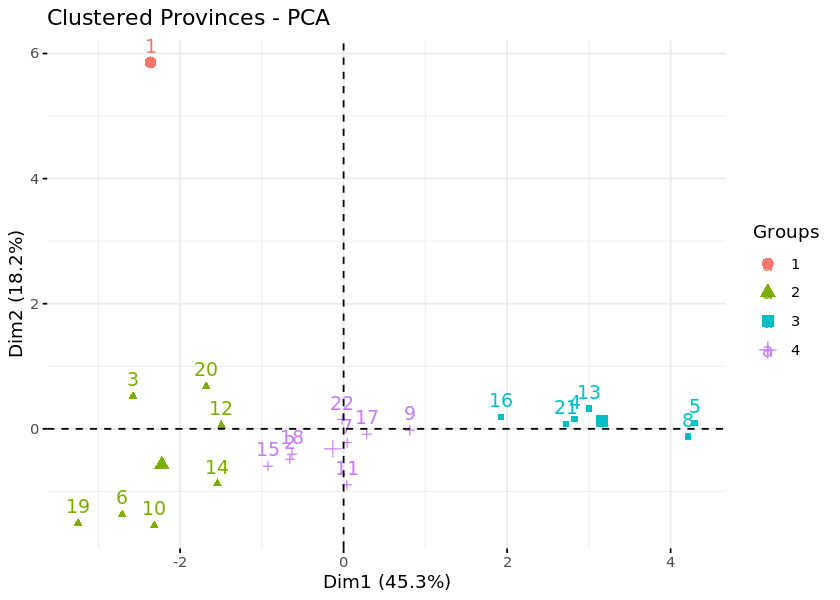

In [ ]:
## 7. Components with colors
# Convert assigned clusters to factor
clusters_as_factor <- factor(argentina_km$cluster)

# Plot individulas colored by cluster
fviz_pca_ind(argentina_pca,
             title = "Clustered Provinces - PCA",
             habillage = clusters_as_factor)

## 8. Buenos Aires, in a league of its own
เนื่องจากตัวแปร gdp กับ pop มีความสัมพันธ์กันสูงมาก บัวโนสไอเรสซึ่งเป็นเมืองหลวงของอาร์เจนตินามีประชากรสูงและก็มี GDP สูง เราลองมาพล็อตกราฟ GDP กับ กลุ่มของแต่ละจังหวัด ซึ่งถ้าเปลี่ยนจาก gdp เป็น pop ผลออกมาก็จะคล้ายกัน

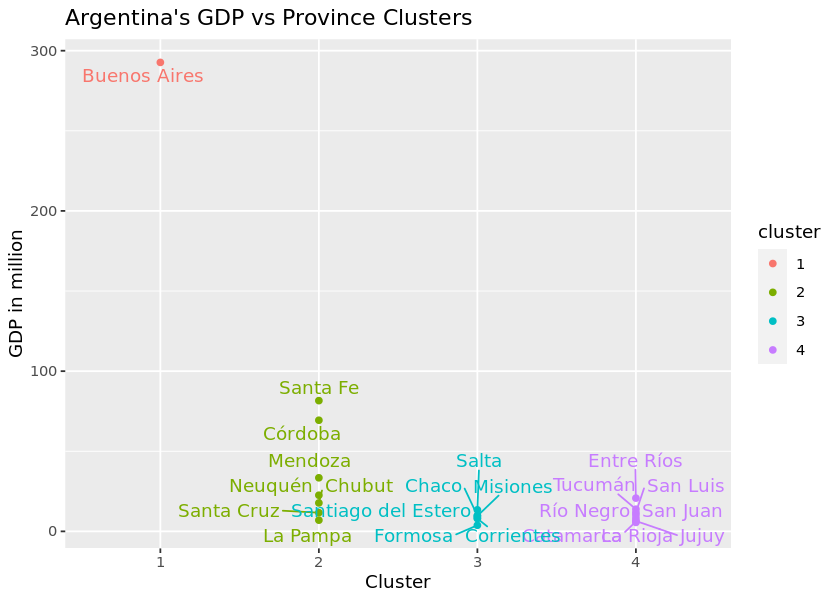

In [ ]:
## 8. Buenos Aires, in a league of its own
# Load ggrepel
library(ggrepel)

# Add cluster column to argentina
argentina <- argentina %>%
               mutate(cluster = clusters_as_factor)


ggplot(argentina, 
       aes(x = cluster, y = (gdp/1000000), color = cluster)) +
  geom_point() + 
  geom_text_repel(aes(label = province), show.legend = FALSE) +
  labs(x = "Cluster", y = "GDP in million") +
  ggtitle("Argentina's GDP vs Province Clusters")

## 9. The rich provinces
หากเราลองพล็อต GDP Per Capita กับกลุ่มแต่ละจังหวัด เราจะสังเกตเห็นได้ว่ากลุ่มที่ 2 นั้นมี GDP Per Capita ที่สูงกว่ากลุ่มอื่นๆ ถ้าเปลี่ยนจาก gdp_per_cap เป็น movie_theaters_per_cap หรือ doctors_per_cap ก็จะได้ผลลัพธ์ใกล้เคียงกัน เนื่องจากทั้ง 3 ตัวแปรนี้มีความสัมพันธ์ใกล้เคียงกัน

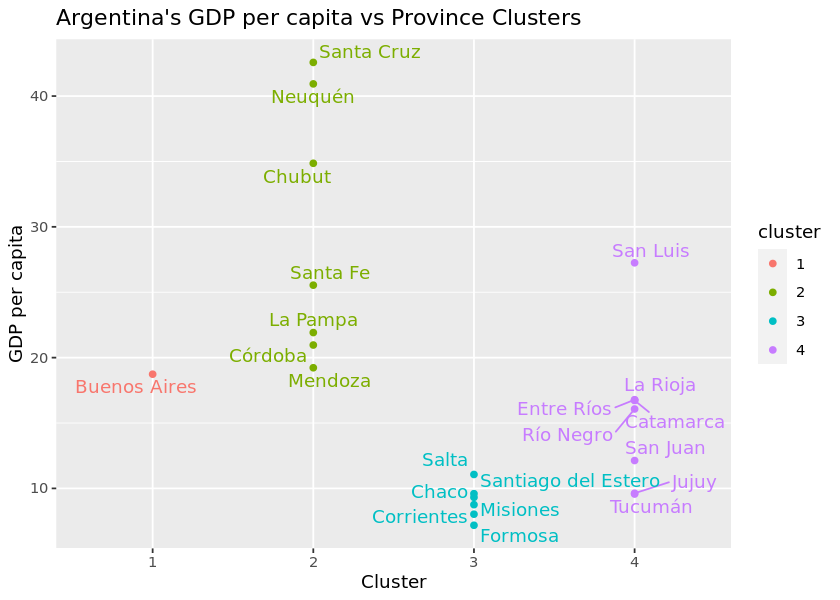

In [ ]:
## 9. The rich provinces
# Make a scatterplot of GDP per capita vs. cluster, colored by cluster
ggplot(argentina,
       aes(x = cluster, y = gdp_per_cap, color = cluster)) +
  geom_point() +
  geom_text_repel(aes(label = province), show.legend = FALSE) +
  labs(x = "Cluster", y = "GDP per capita") +
  ggtitle("Argentina's GDP per capita vs Province Clusters")

## 11. The poor provinces
แล้วกลุ่มจังหวัดที่มีความยากจนที่สุดหละ?

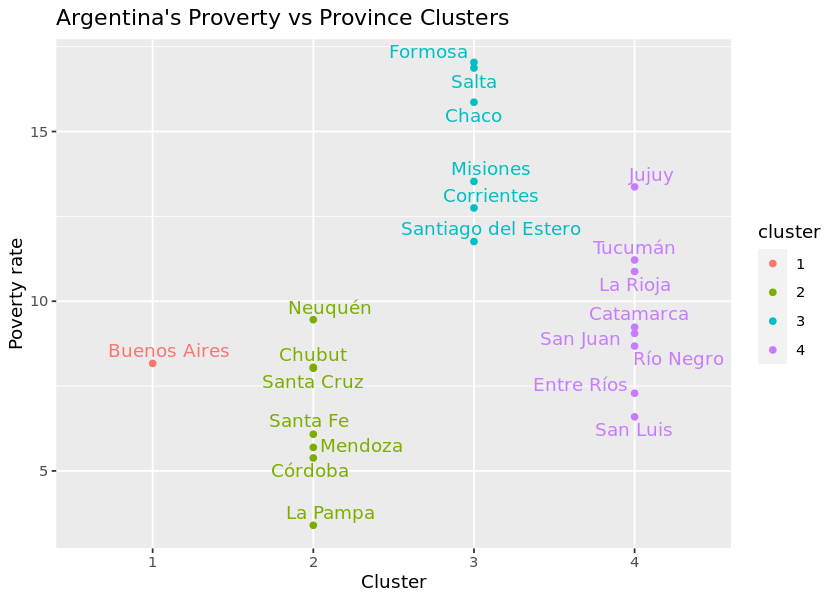

In [ ]:
# Make scatterplot of poverty vs. cluster, colored by cluster
ggplot(argentina, aes(x = cluster, y = poverty, color = cluster)) +
  geom_point() +
  labs(x = "Cluster", y = "Poverty rate") +
  geom_text_repel(aes(label = province), show.legend = FALSE) +
  ggtitle("Argentina's Proverty vs Province Clusters")

## Conclusion
เราได้รู้แล้วว่าสวัสดิการทางสังคมและเศรษฐกิจแตกต่างกันอย่างไรในแต่ละจังหวัด และตัวแปรไหนบ้างที่มีความสัมพันธ์กัน หากเราได้มอบหมายงานมาว่าให้ช่วยวางแผนโครงการการศึกษาโดยเลือกกลุ่มจังหวัดที่มีสภาพแวดล้อมใกล้เคียงกัน ข้อมูลการแบ่งกลุ่มจังหวัดเหล่านี้ก็จะเป็นประโยชน์ต่อการตัดสินใจของเรา

โดยโปรเจคนี้ได้ฝึกพื้นฐาน data tramsformation, visualization, PCA, K-means clustering ซึ่งสำหรับผมแล้วมีคำถามว่า unsupervised learning จะมาใช้ในชีวิตจริงได้อย่างไร ซึ่งโปรเจคนี้ก็ตอบคำถามผมได้ดีเลยยย